In [2]:
import pandas as pd

# Load the CSV file
file_path = r'E:\Fennec\data\01_raw\FSD50K.ground_truth\dev.csv'

df = pd.read_csv(file_path)

df

,fname,labels,mids,split
0,64760,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
1,16399,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
2,16401,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
3,16402,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
4,16404,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
...,...,...,...,...
40961,102863,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40962,389607,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40963,90091,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40964,244718,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train


In [3]:
from collections import Counter

# Split the labels and count occurrences
all_labels = df['labels'].str.split(',')
label_counts = Counter(label for sublist in all_labels for label in sublist)

# Convert to DataFrame for better visualization
label_counts_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count'])
label_counts_df = label_counts_df.sort_values(by='count', ascending=False)

print(label_counts_df)


                                 count
Music                            12767
Musical_instrument               12763
Domestic_sounds_and_home_sounds   4711
Human_voice                       4020
Animal                            3275
...                                ...
Glockenspiel                        56
Tabla                               52
Accordion                           52
Tick                                52
Typewriter                          51

[200 rows x 1 columns]


In [4]:
split_counts = df['split'].value_counts()
print(split_counts)

split
train    36796
val       4170
Name: count, dtype: int64


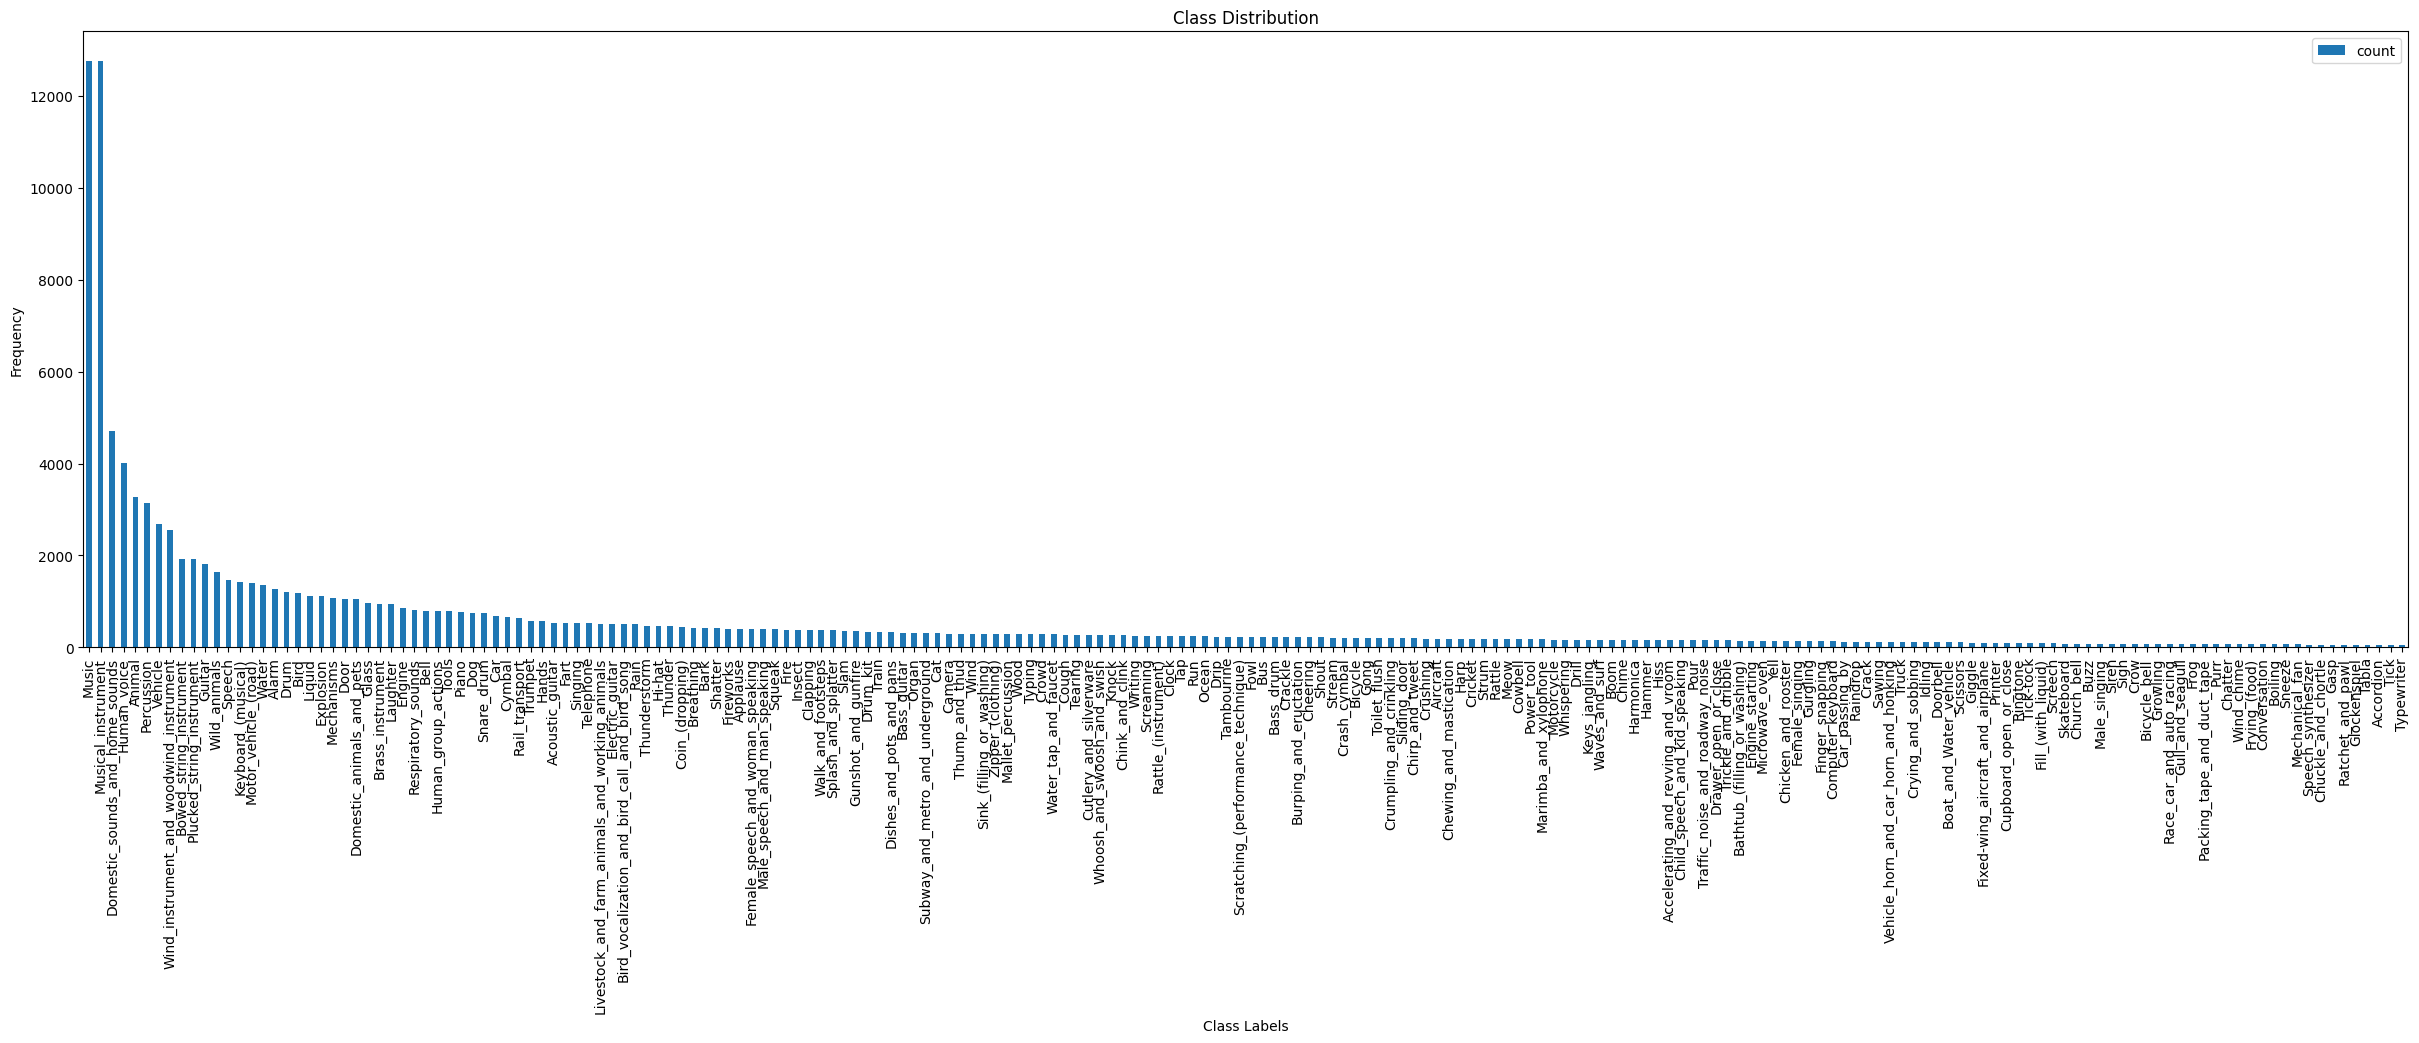

In [9]:
import matplotlib.pyplot as plt

# Plot class distribution
label_counts_df.plot(kind='bar', figsize=(30, 8))
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

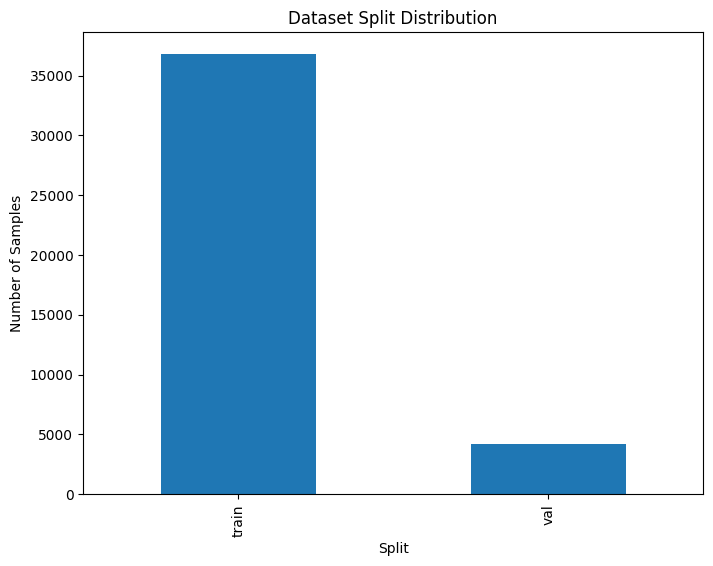

In [10]:
split_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Dataset Split Distribution')
plt.xlabel('Split')
plt.ylabel('Number of Samples')
plt.show()


In [11]:
duplicate_entries = df.duplicated().sum()
print(f'Number of duplicate entries: {duplicate_entries}')

Number of duplicate entries: 0


In [13]:
# Example mapping dictionary
mid_to_label = {
    '/m/02sgy': 'Electric_guitar',
    '/m/0342h': 'Guitar',
    # Add other mappings as needed
}

# Apply mapping to create a new column with human-readable labels
df['human_readable_labels'] = df['mids'].apply(lambda x: ','.join([mid_to_label[mid] for mid in x.split(',') if mid in mid_to_label]))
# Example check for the first row
print(df.iloc[0][['labels', 'mids', 'human_readable_labels']])


labels                   Electric_guitar,Guitar,Plucked_string_instrume...
mids                         /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf
human_readable_labels                               Electric_guitar,Guitar
Name: 0, dtype: object
